## Data



*   dob: date of birth (Matlab serial date number)
*photo_taken: year when the photo was taken
*full_path: path to file
*gender: 0 for female and 1 for male, NaN if unknown
*name: name of the celebrity
*face_location: location of the face. 
*face_score: detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
*second_face_score: detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.
*celeb_names (IMDB only): list of all celebrity names
*celeb_id (IMDB only): index of celebrity name



In [1]:
import scipy.io
import numpy as np

mat = scipy.io.loadmat('./datasets/wiki.mat')
mat_fields = ('dob', 'photo_taken', 'full_path', 'gender', 'name', 
          'face_location', 'face_score', 'second_face_score')

l = 62328
data = np.empty((0, l))
for i, field in enumerate(mat_fields):
    values = np.array([])
    if field == 'face_location':
        continue
    elif field == 'name':
        values = mat['wiki'][0][0][i].flatten()
    else:
        values = np.hstack(mat['wiki'][0][0][i].flatten())
    data = np.append(data, [values], axis=0)
print(data)

[['723671.0' '703186.0' '711677.0' ... '720620.0' '723893.0' '713846.0']
 ['2009.0' '1964.0' '2008.0' ... '2013.0' '2011.0' '2008.0']
 ['17/10000217_1981-05-05_2009.jpg' '48/10000548_1925-04-04_1964.jpg'
  '12/100012_1948-07-03_2008.jpg' ... '09/9998109_1972-12-27_2013.jpg'
  '00/9999400_1981-12-13_2011.jpg' '80/999980_1954-06-11_2008.jpg']
 ...
 [array(['Sami Jauhojärvi'], dtype='<U15')
  array(['Dettmar Cramer'], dtype='<U14')
  array(['Marc Okrand'], dtype='<U11') ...
  array(['Michael Wiesinger'], dtype='<U17')
  array(['Johann Grugger'], dtype='<U14')
  array(['Greta Van Susteren'], dtype='<U18')]
 [4.3009623883308095 2.6456394971903463 4.329328832406529 ...
  3.4943031690208564 -inf 5.486916546849864]
 [nan 1.9492479052091165 nan ... nan nan nan]]


In [2]:
import pandas as pd

df_fields = ('dob', 'photo_taken', 'full_path', 'gender', 'name', 
          'face_score', 'second_face_score')

df = pd.DataFrame(data).transpose()
df.columns = df_fields
df

dob photo_taken                        full_path gender  \
0      723671.0      2009.0  17/10000217_1981-05-05_2009.jpg    1.0   
1      703186.0      1964.0  48/10000548_1925-04-04_1964.jpg    1.0   
2      711677.0      2008.0    12/100012_1948-07-03_2008.jpg    1.0   
3      705061.0      1961.0  65/10001965_1930-05-23_1961.jpg    1.0   
4      720044.0      2012.0  16/10002116_1971-05-31_2012.jpg    0.0   
...         ...         ...                              ...    ...   
62323  707582.0      1963.0   49/9996949_1937-04-17_1963.jpg    1.0   
62324  711338.0      1970.0   32/9997032_1947-07-30_1970.jpg    1.0   
62325  720620.0      2013.0   09/9998109_1972-12-27_2013.jpg    1.0   
62326  723893.0      2011.0   00/9999400_1981-12-13_2011.jpg    1.0   
62327  713846.0      2008.0    80/999980_1954-06-11_2008.jpg    0.0   

                         name face_score second_face_score  
0           [Sami Jauhojärvi]   4.300962               NaN  
1            [Dettmar Cramer]   2.645639          1.949248  
2               [Marc Okrand]   4.329329               NaN  
3      [Aleksandar Matanović]       -inf               NaN  
4              [Diana Damrau]   3.408442               NaN  
...                       ...        ...               ...  
62323             [Guus Haak]   4.029268               NaN  
62324         [Nico Rijnders]       -inf               NaN  
62325     [Michael Wiesinger]   3.494303               NaN  
62326        [Johann Grugger]       -inf               NaN  
62327    [Greta Van Susteren]   5.486917               NaN  

[62328 rows x 7 columns]

In [3]:
df.isnull().sum()

dob                      0
photo_taken              0
full_path                0
gender                   0
name                     0
face_score               0
second_face_score    58232
dtype: int64

In [4]:
df.sort_values(by=['face_score'], ascending=False)

dob photo_taken                        full_path gender  \
34976  718907.0      2008.0   33/3553733_1968-04-19_2008.jpg    1.0   
9398   725093.0      2014.0  11/44164711_1985-03-27_2014.jpg    0.0   
34168  726540.0      2011.0  81/14584481_1989-03-13_2011.jpg    1.0   
32782  724750.0      2010.0   77/1254277_1984-04-18_2010.jpg    0.0   
26105  729769.0      2010.0  01/41464801_1998-01-14_2010.jpg    nan   
...         ...         ...                              ...    ...   
22717  723673.0      1980.0   88/2638488_1981-05-07_1980.jpg    1.0   
22718  700991.0      1941.0  11/26385011_1919-04-01_1941.jpg    1.0   
22719  702955.0      1953.0  87/26386187_1924-08-16_1953.jpg    0.0   
3228   727410.0      2014.0  36/44053236_1991-07-31_2014.jpg    1.0   
31164  697115.0      1950.0   95/4947095_1908-08-20_1950.jpg    0.0   

                       name face_score second_face_score  
34976         [Shai Agassi]   7.081268               NaN  
9398     [Yuliya Biryukova]   7.031374               NaN  
34168      [Robert Wickens]   7.019926               NaN  
32782     [America Ferrera]   7.010399               NaN  
26105  [Nick Romeo Reimann]   6.954115               NaN  
...                     ...        ...               ...  
22717  [Guillaume Lefebvre]       -inf               NaN  
22718    [James MacLachlan]       -inf               NaN  
22719          [Inez Voyce]       -inf               NaN  
3228         [Keith Reaser]       -inf               NaN  
31164      [Ursula Mommens]       -inf               NaN  

[62328 rows x 7 columns]

# Data cleaning

In [5]:
numeric_fields = ["dob", "photo_taken", "gender", "face_score", "second_face_score"]

df[numeric_fields] = df[numeric_fields].apply(pd.to_numeric, errors='coerce')
df = df[df['face_score'] != -np.inf]
df

dob  photo_taken                        full_path  gender  \
0      723671.0       2009.0  17/10000217_1981-05-05_2009.jpg     1.0   
1      703186.0       1964.0  48/10000548_1925-04-04_1964.jpg     1.0   
2      711677.0       2008.0    12/100012_1948-07-03_2008.jpg     1.0   
4      720044.0       2012.0  16/10002116_1971-05-31_2012.jpg     0.0   
5      716189.0       2012.0  02/10002702_1960-11-09_2012.jpg     0.0   
...         ...          ...                              ...     ...   
62321  707521.0       1968.0   38/9996938_1937-02-15_1968.jpg     1.0   
62322  709971.0       1968.0   46/9996946_1943-11-01_1968.jpg     1.0   
62323  707582.0       1963.0   49/9996949_1937-04-17_1963.jpg     1.0   
62325  720620.0       2013.0   09/9998109_1972-12-27_2013.jpg     1.0   
62327  713846.0       2008.0    80/999980_1954-06-11_2008.jpg     0.0   

                        name  face_score  second_face_score  
0          [Sami Jauhojärvi]    4.300962                NaN  
1           [Dettmar Cramer]    2.645639           1.949248  
2              [Marc Okrand]    4.329329                NaN  
4             [Diana Damrau]    3.408442                NaN  
5           [Krista Tippett]    4.748056                NaN  
...                      ...         ...                ...  
62321         [Coen Moulijn]    3.868307                NaN  
62322  [Theo van Duivenbode]    3.735573                NaN  
62323            [Guus Haak]    4.029268                NaN  
62325    [Michael Wiesinger]    3.494303                NaN  
62327   [Greta Van Susteren]    5.486917                NaN  

[44312 rows x 7 columns]

In [6]:
df.isnull().sum()

dob                      0
photo_taken              0
full_path                0
gender                 860
name                     0
face_score               0
second_face_score    40216
dtype: int64

In [7]:
df.describe()

dob   photo_taken        gender    face_score  \
count   44312.000000  44312.000000  43452.000000  44312.000000   
mean   717027.767896   2001.005755      0.751404      3.219157   
std     10039.648799     19.813071      0.432204      1.244676   
min      4077.000000   1940.000000      0.000000      0.731430   
25%    710828.000000   2005.000000      1.000000      2.265031   
50%    719640.500000   2010.000000      1.000000      3.237464   
75%    724816.000000   2012.000000      1.000000      4.153191   
max    735650.000000   2015.000000      1.000000      7.081268   

       second_face_score  
count        4096.000000  
mean            2.009050  
std             0.981277  
min             0.731419  
25%             1.164925  
50%             1.839065  
75%             2.655757  
max             5.463147

In [8]:
df.sort_values(by=['face_score'], ascending=False)

dob  photo_taken                        full_path  gender  \
34976  718907.0       2008.0   33/3553733_1968-04-19_2008.jpg     1.0   
9398   725093.0       2014.0  11/44164711_1985-03-27_2014.jpg     0.0   
34168  726540.0       2011.0  81/14584481_1989-03-13_2011.jpg     1.0   
32782  724750.0       2010.0   77/1254277_1984-04-18_2010.jpg     0.0   
26105  729769.0       2010.0  01/41464801_1998-01-14_2010.jpg     NaN   
...         ...          ...                              ...     ...   
1548   719344.0       2006.0  98/22035798_1969-06-30_2006.jpg     0.0   
13904  708344.0       2007.0    96/222096_1939-05-19_2007.jpg     1.0   
17366  728244.0       2013.0  11/37233711_1993-11-11_2013.jpg     1.0   
32436  686581.0       1953.0  29/41516229_1879-10-17_1953.jpg     1.0   
41955  728203.0       2012.0  02/36670502_1993-10-01_2012.jpg     1.0   

                        name  face_score  second_face_score  
34976          [Shai Agassi]    7.081268                NaN  
9398      [Yuliya Biryukova]    7.031374                NaN  
34168       [Robert Wickens]    7.019926                NaN  
32782      [America Ferrera]    7.010399                NaN  
26105   [Nick Romeo Reimann]    6.954115                NaN  
...                      ...         ...                ...  
1548            [Stacy Head]    0.731882                NaN  
13904        [Sonny Fortune]    0.731840                NaN  
17366      [David Vranković]    0.731580                NaN  
32436     [Harumichi Tanabe]    0.731468                NaN  
41955  [Teklit Teweldebrhan]    0.731430                NaN  

[44312 rows x 7 columns]

(array([3494., 5046., 6489., 7536., 7897., 6722., 4596., 2019.,  467.,
          46.]),
 array([0.73143021, 1.36641401, 2.00139781, 2.63638161, 3.27136541,
        3.90634921, 4.54133301, 5.17631681, 5.81130062, 6.44628442,
        7.08126822]),
 <BarContainer object of 10 artists>)

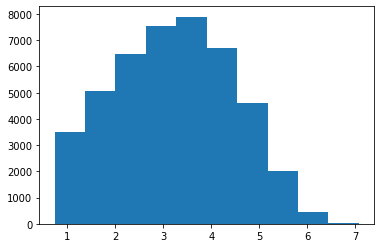

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['face_score'])

In [10]:
df = df[df['face_score'] > 5.5] 
df.sort_values(by=['face_score'], ascending=False)

dob  photo_taken                        full_path  gender  \
34976  718907.0       2008.0   33/3553733_1968-04-19_2008.jpg     1.0   
9398   725093.0       2014.0  11/44164711_1985-03-27_2014.jpg     0.0   
34168  726540.0       2011.0  81/14584481_1989-03-13_2011.jpg     1.0   
32782  724750.0       2010.0   77/1254277_1984-04-18_2010.jpg     0.0   
26105  729769.0       2010.0  01/41464801_1998-01-14_2010.jpg     NaN   
...         ...          ...                              ...     ...   
33737  714990.0       2011.0  82/33530382_1957-07-29_2011.jpg     0.0   
32434  709835.0       1967.0   77/4151577_1943-06-18_1967.jpg     1.0   
2856   718531.0       2007.0   08/2400008_1967-04-09_2007.jpg     1.0   
20113  723757.0       2009.0   96/1237996_1981-07-30_2009.jpg     1.0   
13913  718497.0       2013.0   66/2221466_1967-03-06_2013.jpg     0.0   

                       name  face_score  second_face_score  
34976         [Shai Agassi]    7.081268                NaN  
9398     [Yuliya Biryukova]    7.031374                NaN  
34168      [Robert Wickens]    7.019926                NaN  
32782     [America Ferrera]    7.010399                NaN  
26105  [Nick Romeo Reimann]    6.954115                NaN  
...                     ...         ...                ...  
33737       [Ginni Rometty]    5.501967                NaN  
32434         [Barry Evans]    5.501797                NaN  
2856           [Sam Harris]    5.501653                NaN  
20113        [Nicky Hayden]    5.501266                NaN  
13913      [Connie Britton]    5.500201                NaN  

[1217 rows x 7 columns]

(array([540.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 644.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

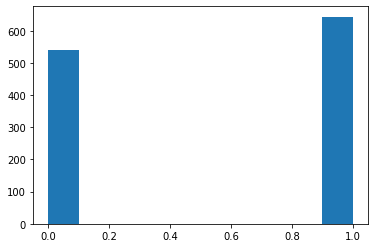

In [11]:
plt.hist(df['gender'])

(array([  9.,  12.,  23.,  33.,  52.,  81., 137., 310., 498.,  62.]),
 array([690514. , 694698.1, 698882.2, 703066.3, 707250.4, 711434.5,
        715618.6, 719802.7, 723986.8, 728170.9, 732355. ]),
 <BarContainer object of 10 artists>)

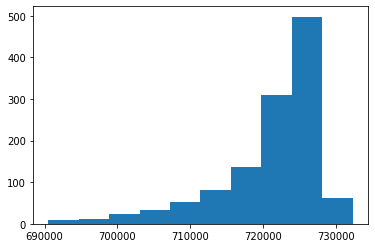

In [12]:
plt.hist(df['dob'])

In [16]:
from datetime import datetime, timedelta

df["dob"] = df["dob"].apply(lambda matlab_datenum: datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366))
df

/var/folders/z4/94ds6m155c3bmc0n3cj83tlh0000gn/T/ipykernel_64311/888538507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dob"] = df["dob"].apply(lambda matlab_datenum: datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366))


dob  photo_taken                        full_path  gender  \
11    1933-06-12       1969.0   56/1000456_1933-06-12_1969.jpg     1.0   
32    1968-10-11       2010.0  95/10014795_1968-10-11_2010.jpg     1.0   
33    1977-03-01       2007.0  79/10015679_1977-03-01_2007.jpg     1.0   
215   1986-05-19       2012.0  06/20013406_1986-05-19_2012.jpg     1.0   
273   1972-10-22       2008.0   90/2005290_1972-10-22_2008.jpg     0.0   
...          ...          ...                              ...     ...   
62105 1995-02-15       2013.0  76/39937376_1995-02-15_2013.jpg     0.0   
62169 1975-08-02       2014.0  01/39990201_1975-08-02_2014.jpg     1.0   
62226 1982-05-09       2012.0    93/599593_1982-05-09_2012.jpg     0.0   
62233 1949-05-20       2010.0    38/599838_1949-05-20_2010.jpg     1.0   
62305 1992-03-13       2013.0   02/9994102_1992-03-13_2013.jpg     1.0   

                      name  face_score  second_face_score date_of_birth  
11           [Eddie Adams]    5.551841                NaN    1933-06-12  
32     [Chandrachur Singh]    5.837994                NaN    1968-10-11  
33       [Maksim Buznikin]    5.640263                NaN    1977-03-01  
215       [Facundo Pieres]    5.538994                NaN    1986-05-19  
273      [Saffron Burrows]    6.182738                NaN    1972-10-22  
...                    ...         ...                ...           ...  
62105       [Sara Däbritz]    5.611729                NaN    1995-02-15  
62169   [Nicholas M. Loeb]    5.953358                NaN    1975-08-02  
62226      [Rachel Boston]    5.822911                NaN    1982-05-09  
62233        [Dave Thomas]    5.739723           3.327986    1949-05-20  
62305      [George MacKay]    5.978161                NaN    1992-03-13  

[1217 rows x 8 columns]

In [20]:
df["age"] = df.apply(lambda x: x.photo_taken - x.dob.year, axis=1)
df

/var/folders/z4/94ds6m155c3bmc0n3cj83tlh0000gn/T/ipykernel_64311/1048137830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df.apply(lambda x: x.photo_taken - x.dob.year, axis=1)


dob  photo_taken                        full_path  gender  \
11    1933-06-12       1969.0   56/1000456_1933-06-12_1969.jpg     1.0   
32    1968-10-11       2010.0  95/10014795_1968-10-11_2010.jpg     1.0   
33    1977-03-01       2007.0  79/10015679_1977-03-01_2007.jpg     1.0   
215   1986-05-19       2012.0  06/20013406_1986-05-19_2012.jpg     1.0   
273   1972-10-22       2008.0   90/2005290_1972-10-22_2008.jpg     0.0   
...          ...          ...                              ...     ...   
62105 1995-02-15       2013.0  76/39937376_1995-02-15_2013.jpg     0.0   
62169 1975-08-02       2014.0  01/39990201_1975-08-02_2014.jpg     1.0   
62226 1982-05-09       2012.0    93/599593_1982-05-09_2012.jpg     0.0   
62233 1949-05-20       2010.0    38/599838_1949-05-20_2010.jpg     1.0   
62305 1992-03-13       2013.0   02/9994102_1992-03-13_2013.jpg     1.0   

                      name  face_score  second_face_score date_of_birth   age  
11           [Eddie Adams]    5.551841                NaN    1933-06-12  36.0  
32     [Chandrachur Singh]    5.837994                NaN    1968-10-11  42.0  
33       [Maksim Buznikin]    5.640263                NaN    1977-03-01  30.0  
215       [Facundo Pieres]    5.538994                NaN    1986-05-19  26.0  
273      [Saffron Burrows]    6.182738                NaN    1972-10-22  36.0  
...                    ...         ...                ...           ...   ...  
62105       [Sara Däbritz]    5.611729                NaN    1995-02-15  18.0  
62169   [Nicholas M. Loeb]    5.953358                NaN    1975-08-02  39.0  
62226      [Rachel Boston]    5.822911                NaN    1982-05-09  30.0  
62233        [Dave Thomas]    5.739723           3.327986    1949-05-20  61.0  
62305      [George MacKay]    5.978161                NaN    1992-03-13  21.0  

[1217 rows x 9 columns]

In [21]:
df.to_csv("./datasets/wiki_faces.csv")

In [26]:
import os, shutil

for index, row in df.iterrows():
    original = "./datasets/wiki_crop/" + row["full_path"]
    target = "./datasets/faces/" + row["full_path"]
    os.makedirs(os.path.dirname(target), exist_ok=True)
    shutil.copyfile(original, target)